In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [103]:
X,y = load_iris(return_X_y = True)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 10)

In [105]:
m = GaussianNB()
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print(m.class_count_)
print(m.class_prior_)
print(m.predict(X_test))
print(m.predict_proba(X_test))

train score :  0.9464285714285714
test score :  1.0
[38. 37. 37.]
[0.33928571 0.33035714 0.33035714]
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
[[1.03551337e-081 9.97663173e-001 2.33682708e-003]
 [2.95168784e-079 9.99647721e-001 3.52278999e-004]
 [1.55082683e-143 4.29751129e-002 9.57024887e-001]
 [6.67343309e-199 5.06131720e-006 9.99994939e-001]
 [6.34898932e-227 1.03232615e-009 9.99999999e-001]
 [1.62783858e-087 9.98233380e-001 1.76662013e-003]
 [1.00000000e+000 1.01896956e-019 5.79526041e-024]
 [1.13141994e-275 1.34536146e-012 1.00000000e+000]
 [1.17037178e-213 4.46425560e-007 9.99999554e-001]
 [1.00000000e+000 4.06642028e-020 3.49368190e-024]
 [1.37179093e-101 9.81659122e-001 1.83408776e-002]
 [3.04755816e-075 9.99586394e-001 4.13605988e-004]
 [4.44687886e-033 9.99995934e-001 4.06607837e-006]
 [5.92371125e-097 9.86635629e-001 1.33643709e-002]
 [1.00000000e+000 5.08861696e-020 3.25048342e-024]
 [3.03275770e-179 2.16665628e-006 9.99997833e-001]
 [1.

In [106]:
m = BernoulliNB()
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.3392857142857143
test score :  0.3157894736842105


In [107]:
# raisin 데이터
# naive bayes 분류기
# 4개 feature 사용, random_state = 10, MinMaxScaler 적용 전 후 score비교.

In [108]:
file = 'Raisin_Dataset.CSV'
df = pd.read_csv(file, encoding = 'cp949')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [109]:
#Encoder
enc = LabelEncoder()

y = enc.fit_transform(df['Class'])

In [110]:
X = df[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify = y, random_state = 10)

In [111]:
m = GaussianNB()
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('recall score : ', metrics.recall_score(y_test, m.predict(X_test)))

train score :  0.84
test score :  0.8355555555555556
recall score :  0.8849557522123894


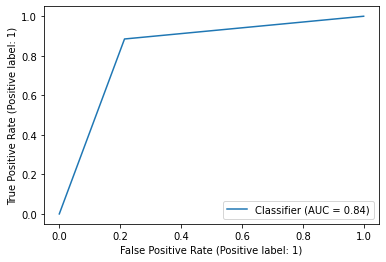

In [112]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

In [113]:
X = df[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]

X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify = y, random_state = 10)

# scale 하고 분류
mms = MinMaxScaler().fit(X_train)

X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [114]:
m = GaussianNB().fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.8577777777777778
test score :  0.8533333333333334


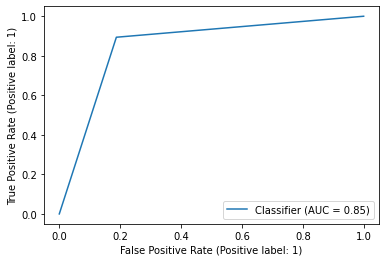

In [115]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

In [116]:
# sklearn.datasets.load_breast_cancer
# naive bayes, LogisticRegression 분류기 비교
# random_state = 10, roc커브
# 가장 높은 확률로 Malignant 예측되는 X_test 샘플은 어느것인가.

In [117]:
X, y = load_breast_cancer(return_X_y = True)

#d = load_breast_cancer()
#print(d.DESCR)
#np.unique(y , return_counts=True) # 0번이 악성, 1번이 양성

enc = LabelEncoder()
y = enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state =10)

mms = MinMaxScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

train score :  0.9413145539906104
test score :  0.916083916083916
precsion :  0.9148936170212766
[1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0]

train score :  0.9647887323943662
test score :  0.958041958041958
precsion :  0.9565217391304348
[1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0]



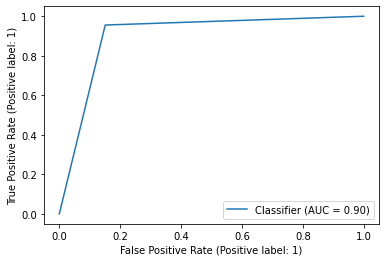

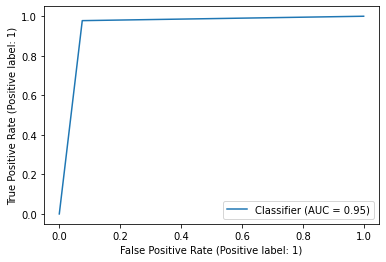

In [123]:
for m in [GaussianNB(), LogisticRegression(solver = 'liblinear')]:
    m.fit(X_train, y_train)
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('precsion : ', metrics.precision_score(y_test, m.predict(X_test)))
    print(m.predict(X_test))
    print('')
    RocCurveDisplay.from_predictions(y_test, m.predict(X_test))